In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
import h5py
import os
import analysis

## p2222 on configuration 200

In [39]:
# file = '/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_14779/cfg200.h5'
file = '/Users/theoares/lqcd/npr_momfrac/output/p2222_cfg200/p2222_cfg200.h5'
f = h5py.File(file, 'r')
S = f['prop/p2222/cfg200'][()]
G = np.einsum('ijab->abij', f['threept/p2222/cfg200'][()])
Sprime = f['propprime/p2222/cfg200'][()]
Gprime = f['threeptprime/p2222/cfg200'][()]

In [40]:
G.shape

(3, 3, 4, 4)

In [35]:
def to_numbers(list):
    return np.array([x[0] + (1j) * x[1] for x in list])

In [42]:
L_000_33 = to_numbers([[5.200565627217e-02, 4.625929269271e-18], [-1.201189210035e-02, -7.448045274136e-02],  [-5.537323293781e-02, 1.474611319049e-01], [-1.193649766131e+03, -7.174162948496e+02]])
L_000_44 = to_numbers([[4.649166791302e-02, -2.312964634636e-18], [-2.054063402814e-02, 4.986272774051e-02],  [-5.239793126012e-02, -3.437144297630e-02], [-4.708573070626e+02, 2.719705791685e+03]])
G_000 = L_000_33 - L_000_44

L_001_33 = to_numbers([[-1.201189210035e-02, 7.448045274136e-02],  [3.086237871136e-01, -5.181040781584e-16],  [-4.276886963102e-01, 1.929388425184e+00],  [-1.692918853527e+04, -1.233273209047e+04]])
L_001_44 = to_numbers([[-2.054063402814e-02, -4.986272774051e-02],  [-3.690282220026e-01, 2.960594732334e-16],  [2.491917757409e+00, 3.152482114813e-01],  [-6.763376040666e+03, -4.312835215077e+03]])
G_001 = L_001_33 - L_001_44

In [37]:
print(G_001)

[ 5.51398836e-03+6.93889390e-18j  8.52874193e-03-1.24343180e-01j
 -2.97530168e-03+1.81832575e-01j -7.22792459e+02-3.43712209e+03j]


In [43]:
print(G[0, 0, 1, :])

[-3.59889863e+00+1.25575572e+00j -6.02915504e-14+2.29416539e+01j
 -5.87612754e+00+6.06903739e+00j  9.20797709e+03+9.05210116e+03j]


In [18]:
trS = np.einsum('ijaa->ij', S)
trSprime = np.einsum('ijaa->ij', Sprime)
trG = np.einsum('ijaa->ij', G)
trGprime = np.einsum('ijaa->ij', Gprime)

print(trS)
print(trSprime)

[[ 1.55433543e+05-2.38253861e-13j  1.86020141e+01+1.85009800e+01j
  -2.75107692e+01-3.83757051e+01j -2.62242580e+01-2.67353027e+01j]
 [ 1.86020141e+01-1.85009800e+01j  1.55483911e+05-6.90558721e-14j
  -3.76601864e+01+5.40328084e+01j  3.25883631e+01-3.85473629e+01j]
 [ 2.75107692e+01-3.83757051e+01j  3.76601864e+01+5.40328084e+01j
   1.55460196e+05+1.70696790e-13j -1.73814026e+01-2.23660424e+01j]
 [ 2.62242580e+01-2.67353027e+01j -3.25883631e+01-3.85473629e+01j
  -1.73814026e+01+2.23660424e+01j  1.55476589e+05+4.51860771e-14j]]
[[ 1.55358490e+05+1.14797061e-13j  1.64794000e-01+1.92811139e+01j
  -2.57354232e+01+4.42619779e+00j  2.00110225e+01-2.55145537e+01j]
 [ 1.64794000e-01-1.92811139e+01j  1.55411146e+05+4.59854377e-13j
   4.66051675e+01+2.01848089e+00j  1.57974261e+01-5.50803833e+00j]
 [ 2.57354232e+01+4.42619779e+00j -4.66051675e+01+2.01848089e+00j
   1.55416191e+05-9.38138456e-15j -1.10093797e+01-1.80903710e+00j]
 [-2.00110225e+01-2.55145537e+01j -1.57974261e+01-5.50803833e+00j
  

## Other testing code

In [4]:
# # Run to determine the difference in observables after gauge transformation.
# file = '/Users/theoares/lqcd/npr_momfrac/testing/output/cl3_16_48_b6p1_m0p2450_14503/cfg200.h5'
# f = h5py.File(file, 'r')
# propprime_p2222 = f['propprime/p2222/cfg200'][()]
# prop_p2222 = f['prop/p2222/cfg200'][()]
# delta = prop_p2222 - propprime_p2222
# scale = np.abs(prop_p2222[0, 0, 0, 0])
# print(np.max(delta / scale)) # first order entries are of size 10^4

In [5]:
# file = '/Users/theoares/lqcd/npr_momfrac/examples/analysis_EXAMPLE_output.h5'
# f = h5py.File(file, 'r')
# S = f['prop/p2222'][()]

In [6]:
# #confirm 2 point function is the same as Phiala's (it is)
# file = '/Users/theoares/lqcd/npr_momfrac/examples/meas/cl3_16_48_b6p1_m0p2450/pion_beam_npr_matrix_200.h5'
# f = h5py.File(file, 'r')
# S = f['prop/p2222'][()]

# file1 = '/Users/theoares/lqcd/npr_momfrac/output/cl3_16_48_b6p1_m0p2450_14779/cfg200.h5'
# f1 = h5py.File(file1, 'r')
# S1 = f1['prop/p2222/cfg200'][()]

# print(S - S1)

In [7]:
# tr1 = np.einsum('aiaj->ij', props['p2222'][0])
# tr2 = np.einsum('aiaj->ij', props1['p2222'][0])
# tr1[np.abs(tr1) < 10] = 0
# tr2[np.abs(tr2) < 10] = 0
# print(tr1)
# print(tr2)

## Run code on qlua output

In [10]:
cfgbase = 'cl3_16_48_b6p1_m0p2450'
job_num = 14779
base = './output/' + cfgbase + '_' + str(job_num)

# base = './output/p2222_cfg200'    #just run with one configuration for comparison

props, threepts = analysis.readfile(base)

V = analysis.get_hypervolume()

In [11]:
mom_list = analysis.get_mom_list()
s = 0    # TODO seed this with something random
props_boot = analysis.bootstrap(props, seed = s)
threept_boot = analysis.bootstrap(threepts, seed = s)

In [12]:
props_inv = analysis.invert_prop(props_boot)
Γ = analysis.amputate(props_inv, threept_boot)
Zq = analysis.quark_renorm(props_inv)
Γ_B, Γ_B_inv = analysis.born_term()
# TODO what happens if I don't invert Γ_B?
# Z = analysis.get_Z(Zq, Γ, Γ_B_inv)
Z = analysis.get_Z(Zq, Γ, Γ_B)

In [ ]:
#compare with analysis_EXAMPLE.py for p2222 and cfg 200
print('Two point')
print(props_boot['p2222'][0, 0])
print('Two point inverse')
print(props_inv['p2222'][0, 0])
print('Quark renormalization')
print(Zq['p2222'])

In [13]:
μ, σ = analysis.get_statistics_Z(Z)
print(μ)
print(σ)

{'p2222': (-1.0465873e-13+2.7828291e-05j), 'p2224': (3.114519e-14+1.8269506e-05j), 'p2226': (9.095285e-14+1.4278718e-05j), 'p3332': (6.5233694e-14+1.098871e-05j), 'p3334': (-3.0690293e-16+8.101125e-06j), 'p3336': (-9.462134e-15+6.2917115e-06j), 'p3338': (1.9327925e-14+5.811218e-06j), 'p4444': (-2.1671679e-15-7.078747e-08j), 'p4446': (7.8208e-15+1.0004777e-06j), 'p4448': (-2.2853627e-17+1.7565498e-06j)}
{'p2222': 1.4477887e-05, 'p2224': 9.703355e-06, 'p2226': 6.966505e-06, 'p3332': 9.584907e-06, 'p3334': 6.8171757e-06, 'p3336': 5.161326e-06, 'p3338': 4.0909044e-06, 'p4444': 5.1908514e-06, 'p4446': 4.032059e-06, 'p4448': 3.533551e-06}


<IPython.core.display.Javascript object>


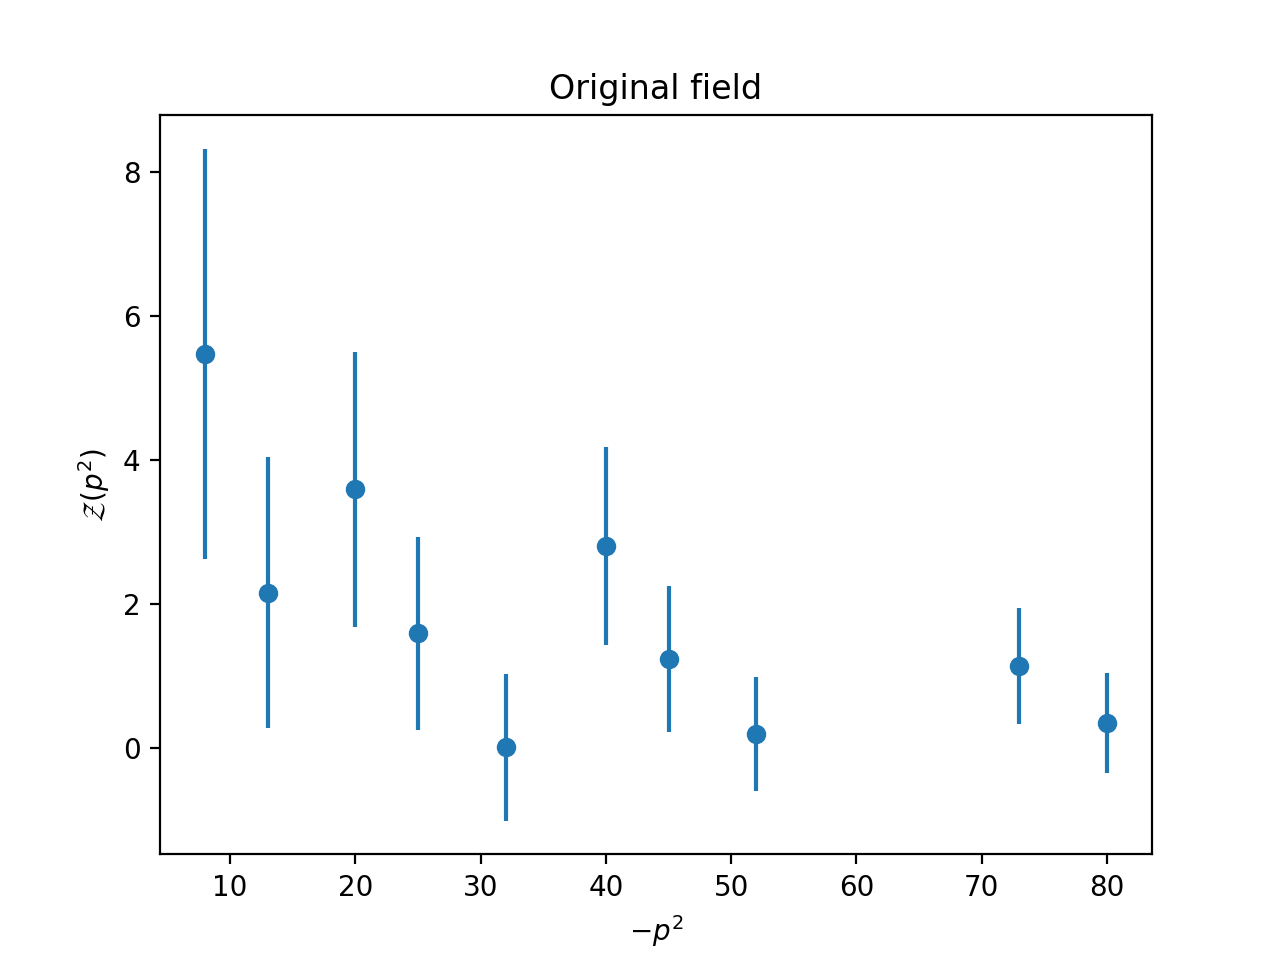

In [16]:
p_squared = np.array([np.abs(analysis.square(p)) for p in mom_list])
μ_list = np.array([μ[analysis.plist_to_string(p)] for p in mom_list])
σ_list = np.array([σ[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list), yerr = np.abs(σ_list), fmt = 'o')
plt.ylabel('$\mathcal{Z}(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Original field')
plt.show()

## Run on gauge transformed output

In [ ]:
props1, threepts1 = analysis.readfile(base, True)

In [ ]:
props_boot1 = analysis.bootstrap(props1, seed = s)
threept_boot1 = analysis.bootstrap(threepts1, seed = s)

In [ ]:
props_inv1 = analysis.invert_prop(props_boot1)
Γ1 = analysis.amputate(props_inv1, threept_boot1)
Zq1 = analysis.quark_renorm(props_inv1)
Z1 = analysis.get_Z(Zq1, Γ1, Γ_B_inv)

In [ ]:
μ1, σ1 = analysis.get_statistics_Z(Z1)
print(μ1)
print(σ1)

In [ ]:
μ_list1 = np.array([μ1[analysis.plist_to_string(p)] for p in mom_list])
σ_list1 = np.array([σ1[analysis.plist_to_string(p)] for p in mom_list])
plt.figure()
plt.errorbar(p_squared, np.abs(μ_list1), yerr = np.abs(σ_list1), fmt = 'o')
plt.ylabel('$\mathcal{Z}_{gauge}(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Gauge transformed field')
plt.show()

In [ ]:
Δ = np.abs(μ_list) - np.abs(μ_list1)
σ_Δ = np.sqrt(σ_list ** 2 + σ_list1 ** 2)
plt.figure()
plt.errorbar(p_squared, np.abs(Δ), yerr = np.abs(σ_Δ), fmt = 'o')
plt.ylabel('$(\mathcal{Z} - \mathcal{Z}_{gauge})(p^2)$')
plt.xlabel('$-p^2$')
plt.title('Difference in \mathcal{Z} values')
plt.show()

There is a phase difference of about -1 between the original field and the gauge transformed field. Is there something I'm doing that's systematically creating that after the code is run?